Making figures

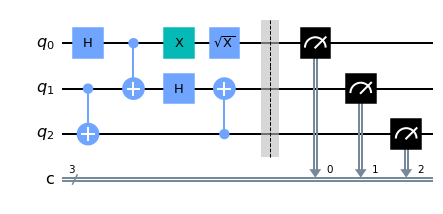

In [6]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(3, 3)

qc.h(0)
qc.cx(1, 2)
qc.cx(0,1)
qc.x(0)
qc.h(1)
qc.cx(2,1)
qc.sx(0)
qc.measure_all(add_bits=False)

qc.draw(output='mpl')

In [10]:
from qiskit import execute
from qiskit_aer import QasmSimulator
backend = QasmSimulator()
result = execute(qc, backend, shots=100000).result()
counts = result.get_counts()
all_z_exp = 0
for key, value in counts.items():
    num_ones = key.count('1')
    sign = (-1) ** (num_ones) # Sign of the term in 'key' depends on the number of 0's, e.g. '11' is +, '110' is -
    all_z_exp += sign * value
    all_z_exp = all_z_exp / 100000
print(all_z_exp)


-0.25021749147502426


Plot histograms of convergence number and energy error from Iskandar's data

In [3]:
import json
f = open('vqe_h2_with_histories.json')
data = json.load(f)

In [14]:
data

{'bond_lengths': [0.2,
  0.4,
  0.5,
  0.67,
  0.7,
  0.72,
  0.73,
  0.74,
  1.0,
  1.2,
  1.4,
  1.6,
  1.8,
  2.0,
  3.0,
  4.0],
 'ideal_values': [0.16355793002624308,
  -0.8987187472628237,
  -1.0330850791568156,
  -1.1158621953330514,
  -1.123398061003981,
  -1.0924918803906356,
  -1.1017203046118034,
  -1.1139457887172717,
  -1.0568770816257835,
  -1.002934221912504,
  -0.9237519444593674,
  -0.8788417504405132,
  -0.823556018690853,
  -0.7910354773165194,
  -0.6365963426407767,
  -0.6100841529319103],
 'noisy_values': [0.3969191794081175,
  -0.7181441790559402,
  -0.872694716127636,
  -0.964854208302655,
  -0.9693432382499239,
  -0.9909409352530567,
  -1.0111046903727485,
  -1.0080789980957376,
  -0.9663442750639475,
  -0.9399096611060123,
  -0.8837333877456827,
  -0.8554446168079599,
  -0.7921333453462791,
  -0.7681919513322499,
  -0.6523815048268904,
  -0.5924700520077887],
 'mitigated_values': [0.12208257615566254,
  -0.9486937522888184,
  -1.0112144947052002,
  -1.114067792

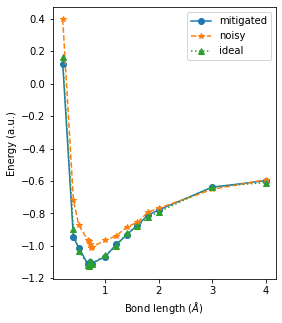

In [60]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (4,5)
plt.plot(data['bond_lengths'], data['mitigated_values'], label='mitigated', marker='o', linestyle='solid')
plt.plot(data['bond_lengths'], data['noisy_values'], label='noisy',marker= '*', linestyle='dashed')
plt.plot(data['bond_lengths'], data['ideal_values'], label='ideal', marker='^', linestyle='dotted')

plt.ylabel('Energy (a.u.)')
plt.xlabel(r'Bond length ($\AA$)')
plt.legend()

Text(0, 0.5, 'Probability')

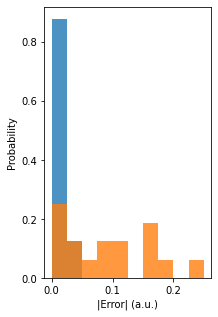

In [56]:
import numpy as np

error_noisy = np.abs(np.subtract(data['ideal_values'], data['noisy_values']))
error_mitigated = np.abs(np.subtract(data['ideal_values'], data['mitigated_values']))
error_ideal = np.abs(np.subtract(data['ideal_values'], data['ideal_values']))

hist_options = {'bins': 10, 'density': False, 'range': [0, 0.25]}
plt.rcParams["figure.figsize"] = (3,5)
# plt.hist(error_ideal, label='ideal', weights=np.ones_like(error_ideal) / len(error_ideal), alpha=0.8, **hist_options)
plt.hist(error_mitigated, label='mitigated', weights=np.ones_like(error_mitigated) / len(error_mitigated), alpha=0.8, **hist_options)
plt.hist(error_noisy, label='noisy', weights=np.ones_like(error_noisy) / len(error_noisy), alpha=0.8, **hist_options)
plt.xlabel('|Error| (a.u.)')
plt.ylabel('Probability')
# plt.legend()

Text(0, 0.5, 'Probability')

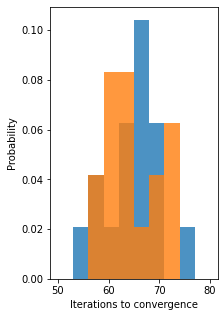

In [61]:
iterations_ideal = [len(iterations) for iterations in data['ideal_histories']]
iterations_noisy = [len(iterations) for iterations in data['noisy_histories']]
iterations_mitigated = [len(iterations) for iterations in data['mitigated_histories']]

hist_options = {'bins': 10, 'density': True, 'range': [50, 80]}
plt.rcParams["figure.figsize"] = (3,5)
# plt.hist(iterations_ideal, label='ideal', weights=np.ones_like(error_ideal) / len(error_ideal), **hist_options)
plt.hist(iterations_mitigated, label='mitigated', weights=np.ones_like(error_mitigated) / len(error_mitigated), alpha=0.8, **hist_options)
plt.hist(iterations_noisy, label='noisy', weights=np.ones_like(error_noisy) / len(error_noisy), alpha=0.8, **hist_options)

plt.xlabel('Iterations to convergence')
plt.ylabel('Probability')
# plt.legend()

In [29]:
iterations_ideal

[65, 65, 71, 73, 75, 65, 70, 67, 70, 69, 64, 72, 65, 60, 55, 57]

Understand why we see charge imbalance > 1 at depth = 0

In [1]:
import json
f = open('230302_single_z_exp_at_steps.json')
data = json.load(f)

In [18]:
init_states_ideal = []
init_states_noisy = []
init_states_mitigated_mbd = []
init_states_mitigated_rand_brick = []

for i in range(len(data['exp_Z_mitigated_rand_brick'])):
    for j in range(4):
        init_states_ideal.append(data['exp_Z_ideal'][i][0][j])
        init_states_noisy.append(data['exp_Z_noisy'][i][0][j])
        init_states_mitigated_mbd.append(data['exp_Z_mitigated_mbd'][i][0][j])
        init_states_mitigated_rand_brick.append(data['exp_Z_mitigated_rand_brick'][i][0][j])


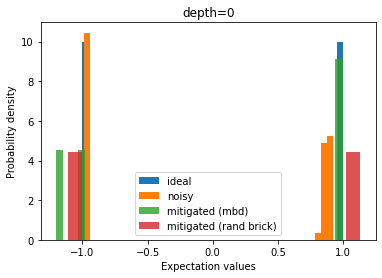

In [23]:
import matplotlib.pyplot as plt
num_bins = 40
plt.hist(init_states_ideal, density=True, bins=num_bins, label='ideal')
plt.hist(init_states_noisy, density=True, bins=num_bins, label='noisy')
plt.hist(init_states_mitigated_mbd, density=True, bins=num_bins, label='mitigated (mbd)', alpha=0.8)
plt.hist(init_states_mitigated_rand_brick, density=True, bins=num_bins, label='mitigated (rand brick)', alpha=0.8)
plt.xlabel('Expectation values')
plt.ylabel('Probability density')
plt.title('depth=0')
plt.legend()

In [13]:
len(data['exp_Z_mitigated_rand_brick'])

30

In [7]:
data['exp_Z_ideal'][1][0]

[1.0, -1.0, 1.0, -1.0]

In [8]:
data['exp_Z_noisy'][0][0]

[0.8406, -0.9754, 0.9208, -0.986]

In [9]:
data['exp_Z_mitigated_mbd'][0][0]

[0.9951923489570618,
 -1.0013976097106934,
 0.9832518696784973,
 -1.1970462799072266]

In [10]:
data['exp_Z_mitigated_rand_brick'][0][0]

[1.1192376613616943,
 -1.1051464080810547,
 1.0332837104797363,
 -1.013692021369934]

Figure for many-body dynamics circuit

In [35]:
import numpy as np
import random
from qiskit import QuantumCircuit
from qiskit.circuit import Parameter
from qiskit.circuit.library import U3Gate, CZGate, PhaseGate, CXGate

def construct_mbl_circuit_symbolic(num_qubit, steps):
    """Construct the circuit for Floquet dynamics of an MBL circuit.

    Args:
        num_spins (int): Number of spins. Must be even.
        W (float): Disorder strength up to np.pi.
        theta (float): Interaction strength up to np.pi.
        steps (int): Number of steps.
    """
    qc = QuantumCircuit(8)
    phi_list = [Parameter(r'$\phi$' + str(i)) for i in range(num_qubit)]
    theta = Parameter(r'$\theta$')

    start = 0
    # Hard domain wall initial state
    # Qubits 0 to num_qubit/2 - 1 are up, and qubits num_qubit/2 to num_qubit - 1 are down
    for qubit_idx in range(start, num_qubit+start):
        if (qubit_idx-start) % 2 == 1:
            qc.x(qubit_idx)
    qc.barrier()

    ## Floquet evolution
    for step in range(steps):
        # Interactions between even layers
        for even_qubit in range(start, num_qubit+start, 2):
            qc.append(CZGate(), (even_qubit, even_qubit+1))
            qc.append(U3Gate(theta, 0, -np.pi), [even_qubit])
            qc.append(U3Gate(theta, 0, -np.pi), [even_qubit+1])
        # qc.barrier()
        # Interactions between odd layers
        for odd_qubit in range(start+1, num_qubit+start-1, 2):
            qc.append(CZGate(), (odd_qubit, odd_qubit+1))
            qc.append(U3Gate(theta, 0, -np.pi), [odd_qubit])
            qc.append(U3Gate(theta, 0, -np.pi), [odd_qubit+1])
        qc.barrier()
        # Apply RZ disorder
        for q in range(start, num_qubit+start):
            qc.append(PhaseGate(phi_list[q-start]), [q])
        qc.barrier()


    # Measure Z^{\otimes num_qubit}, or the all-Z operator from which all Z, ZZ, ... operators can be computed
    # qc.measure_all()

    return qc

qc = construct_mbl_circuit_symbolic(8, 1)

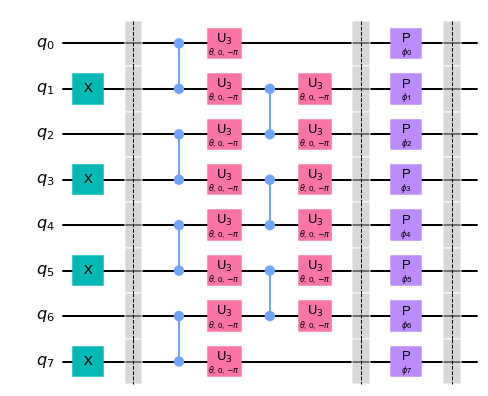

In [36]:
qc.draw(output='mpl', fold=-1)

In [74]:
def construct_mbl_circ_with_cut(num_qubit, steps, broken_connections=[]):
    """Construct the circuit for Floquet dynamics of an MBL circuit.

    Args:
        num_spins (int): Number of spins. Must be even.
        W (float): Disorder strength up to np.pi.
        theta (float): Interaction strength up to np.pi.
        steps (int): Number of steps.
        broken_connections (list[tuple]): Qubit pairs that are should not interact in the MBL circuit written as (i, j) where i < j
    """
    qc = QuantumCircuit(num_qubit)
    phi_list = [Parameter(r'$\phi$' + str(i)) for i in range(num_qubit)]
    theta = Parameter(r'$\theta$')

    # Hard domain wall initial state
    # Qubits 0 to num_qubit/2 - 1 are up, and qubits num_qubit/2 to num_qubit - 1 are down
    for qubit_idx in range(num_qubit):
        if qubit_idx % 2 == 1:
            qc.x(qubit_idx)
    qc.barrier()

    ## Floquet evolution
    for step in range(steps):
        # Interactions between even layers
        for even_qubit in range(0, num_qubit, 2):
            if (even_qubit, even_qubit + 1) not in broken_connections:
                qc.append(CZGate(), (even_qubit, even_qubit + 1))
        # qc.barrier()
        for even_qubit in range(0, num_qubit, 2):
            qc.append(U3Gate(theta, 0, -np.pi), [even_qubit])
            qc.append(U3Gate(theta, 0, -np.pi), [even_qubit + 1])
        # qc.barrier()
        # Interactions between odd layers
        for odd_qubit in range(1, num_qubit - 1, 2):
            if (odd_qubit, odd_qubit + 1) not in broken_connections:
                qc.append(CZGate(), (odd_qubit, odd_qubit + 1))
        # qc.barrier()
        for odd_qubit in range(1, num_qubit - 1, 2):
            qc.append(U3Gate(theta, 0, -np.pi), [odd_qubit])
            qc.append(U3Gate(theta, 0, -np.pi), [odd_qubit + 1])
        qc.barrier()
        # Apply RZ disorder
        for q in range(num_qubit):
            qc.append(PhaseGate(phi_list[q]), [q])
        qc.barrier()

    # Measure Z^{\otimes num_qubit}, or the all-Z operator from which all Z, ZZ, ... operators can be computed

    return qc

qc = construct_mbl_circ_with_cut(8, 1, [(1, 2), (4, 5)])

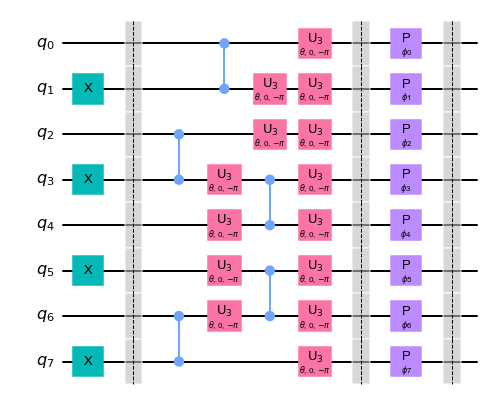

In [75]:
qc.draw('mpl', fold=-1, plot_barriers=True, justify='right')